In [1]:
# 电影评论分类：二分类问题
import numpy as np
from keras.datasets import imdb
# imdb数据集包含来自互联网电影数据库（IMDB）的 50 000 条严重两极分
# 化的评论。数据集被分为用于训练的 25 000 条评论与用于测试的 25 000 条评论，训练集和测试
# 集都包含 50% 的正面评论和 50% 的负面评论。

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(r'D:\imdb.npz',num_words=10000)
# 加载本地的数据集

In [3]:
print(train_data.shape,test_data.shape)
print(train_labels.shape,test_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


In [4]:
max([max(x) for x in train_data])

9999

In [6]:
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))# 创建一个形状为 (len(sequences),dimension) 的零矩阵
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1# 将 results[i] 的指定索引设为 1
    return results
x_train=vectorize_sequences(train_data)# 将训练数据向量化
x_test=vectorize_sequences(test_data)# 将测试数据向量化

In [8]:
print(x_train[0])
print(train_data[0])

[0. 1. 1. ... 0. 0. 0.]
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [9]:
# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
# 模型定义
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
# 什么是激活函数？为什么要使用激活函数？
# 如果没有 relu 等激活函数（也叫非线性）Dense层将只包含两个线性运算——点积和加法：
# output = dot(W, input) + b
# 这样Dense层就只能学习输入数据的线性变换（仿射变换）：该层的假设空间是从输
# 入数据到 16 位空间所有可能的线性变换集合。这种假设空间非常有限，无法利用多个表示
# 层的优势，因为多个线性层堆叠实现的仍是线性运算，添加层数并不会扩展假设空间。
# 为了得到更丰富的假设空间，从而充分利用多层表示的优势，你需要添加非线性或激
# 活函数。 relu 是深度学习中最常用的激活函数，但还有许多其他函数可选，它们都有类似
# 的奇怪名称，比如 prelu 、 elu 等。

In [12]:
# 编译模型（优化器、损失函数、监控精度）
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
# 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
print(x_val.shape)
print(partial_x_train.shape)
print(y_val.shape)
print(partial_y_train.shape)

(10000, 10000)
(15000, 10000)
(10000,)
(15000,)


In [14]:
# 训练模型
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))
# 注意，调用 model.fit() 返回了一个 History 对象。这个对象有一个成员 history ，它
# 是一个字典，包含训练过程中的所有数据。我们来看一下。



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 10s 670us/step - loss: 0.4973 - accuracy: 0.7871 - val_loss: 0.4057 - val_accuracy: 0.8332
Epoch 2/20
15000/15000 [==============================] - 7s 457us/step - loss: 0.2894 - accuracy: 0.9055 - val_loss: 0.3012 - val_accuracy: 0.8866
Epoch 3/20
15000/15000 [==============================] - 6s 422us/step - loss: 0.2152 - accuracy: 0.9278 - val_loss: 0.2887 - val_accuracy: 0.8837
Epoch 4/20
15000/15000 [==============================] - 7s 500us/step - loss: 0.1674 - accuracy: 0.9474 - val_loss: 0.3271 - val_accuracy: 0.8688
Epoch 5/20
15000/15000 [==============================] - 6s 429us/step - loss: 0.1356 - accuracy: 0.9587 - val_loss: 0.3094 - val_accuracy: 0.8786
Epoch 6/20
15000/15000 [==============================] - 7s 453us/step - loss: 0.1112 - accuracy: 0.9667 - val_loss: 0.3051 - val_accuracy: 0.8826
Epoch 7/20
15000/15000 [==============================] - 6s

NameError: name 'dict_keys' is not defined

In [ ]:
history_dict = history.history
# dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])
# 字典中包含 4 个条目，对应训练过程和验证过程中监控的指标。在下面两个代码清单中，
# 我们将使用 Matplotlib 在同一张图上绘制训练损失和验证损失（见图 3-7），以及训练精度和验证精度（见图 3-8）。
# 注意，由于网络的随机初始化不同，得到的结果可能会略有不同。# 绘制训练损失和验证损失

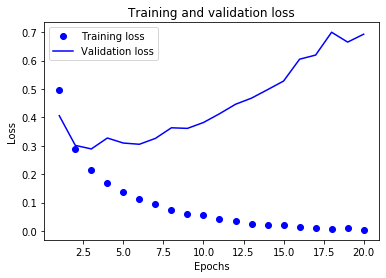

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')# 'bo' 表示蓝色圆点
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')# 'b' 表示蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

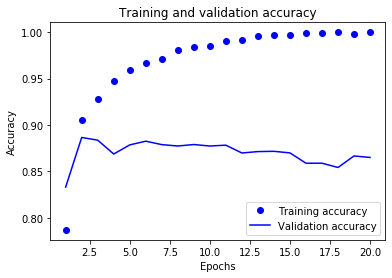

In [21]:
# 绘制训练精度和验证精度
plt.clf()# 清空图像
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# 训练损失每轮都在降低，训练精度每轮都在提升。这就是梯度下降优化的预期结果
# 想要最小化的量随着每次迭代越来越小。
# 但验证损失和验证精度并非如此：它们似乎在第四轮达到最佳值。
# 这就是我们之前警告过的一种情况：模型在训练数据上的表现越来越好，但在前所未见的数据上不一定表现得越来越好。
# 准确地是过拟合（overfit）：在第二轮之后，对训练数据过度优化，最终学到的表示仅针对于训练数据，无法泛化到训练集之外的数据。
# 在这种情况下，为了防止过拟合，可以在 3 轮之后停止训练。通常来说，可以使用许多方法来降低过拟合
# 我们从头开始训练一个新的网络，训练 4 轮，然后在测试数据上评估模型。

In [23]:
# 从头开始重新训练一个模型
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
# 对比
# history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 11s 450us/step - loss: 0.4477 - accuracy: 0.8271
Epoch 2/4
25000/25000 [==============================] - 7s 292us/step - loss: 0.2615 - accuracy: 0.90821s - loss: 0.2652 - ac
Epoch 3/4
25000/25000 [==============================] - 8s 309us/step - loss: 0.2002 - accuracy: 0.9310
Epoch 4/4
25000/25000 [==============================] - 12s 475us/step


In [25]:
results
# 这种相当简单的方法得到了 88% 的精度。利用最先进的方法，应该能够得到接近 95% 的精度

[0.30173719826698303, 0.8811200261116028]

In [27]:
# 训练好网络之后，用于实践。可以用 predict 方法来得到评论为正面的可能性大小。
model.predict(x_test)

array([[0.1504144 ],
       [0.9994801 ],
       [0.6121148 ],
       ...,
       [0.08862579],
       [0.03930596],
       [0.6450207 ]], dtype=float32)

In [28]:
# 网络对某些样本的结果非常确信（大于等于 0.99，或小于等于 0.01），但对其他结果却不那么确信（0.6 或 0.4）。